# Feature detection with stacked auto-encoders

## 1. Importing the dataset

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

Note that You sould download the MNIST data or it gonna be downloaded if you don't have it locally

In [5]:
mnist = input_data.read_data_sets('./MNIST_data', one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


(784,)


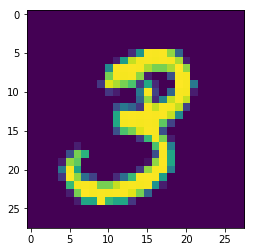

In [19]:
plt.imshow(mnist.train.images[1].reshape(28, 28))
print(mnist.train.images[1].shape)

## 2. Setting up the Model

#### The stacked auto-encoder will gonna be four lyers
The Encoding part:
- The input layer wich consists of 784 the dimensions of the image as the imgs in MNIST Data and reshape it to (28, 28)
- Then the second layer 392 common technique is to use (previous_lyr/2)
- Third_lyr 196 neuron 

The Decoding part:
- fourth_lyr 392 neuron
- fifth_lyr 784
    > Regenerating the input in the output layer

In [21]:
num_inputs = 784
neurons_h1 = 392
neurons_h2 = 196
neurons_h3 = neurons_h1
num_outputs = num_inputs
lr = 0.01
act_fn = tf.nn.relu
initializer = tf.variance_scaling_initializer() 

### Our variables and place holders

In [22]:
X = tf.placeholder(tf.float32, [None, num_inputs])

- Initializing biases with zeros
- using the variance scaling initializer to initialize weights

In [23]:
w1 = tf.Variable(initializer([num_inputs, neurons_h1]), dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_h1, neurons_h2]), dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_h2, neurons_h3]), dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_h3, num_outputs]), dtype=tf.float32)
b1 = tf.Variable(tf.zeros(neurons_h1))
b2 = tf.Variable(tf.zeros(neurons_h2))
b3 = tf.Variable(tf.zeros(neurons_h3))
b4 = tf.Variable(tf.zeros(num_outputs))

### Creating the layers

In [24]:
hid_lyr1 = act_fn(tf.matmul(X, w1) + b1)
hid_lyr2 = act_fn(tf.matmul(hid_lyr1, w2) + b2)
hid_lyr3 = act_fn(tf.matmul(hid_lyr2, w3) + b3)
output_lyr = act_fn(tf.matmul(hid_lyr3, w4) + b4)

### Creating the loss function and the optimizer

In [25]:
loss = tf.reduce_mean(tf.square(X - output_lyr))
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

In [26]:
saver = tf.train.Saver()
num_epochs = 5
batch_sze = 128

### Uncomment the next section to retrain the model 
### Or go to the next step and load the saved one

In [27]:
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())

#     for epoch in range(num_epochs):
#         num_batches = (mnist.train.num_examples // batch_sze)
#         for _ in range(num_batches):
#             X_batch, _ = mnist.train.next_batch(batch_sze)
#             sess.run(train, feed_dict={X: X_batch})

#         training_loss = loss.eval(feed_dict={X: X_batch})
#         print("Epoch: {}, Loss: {}".format(epoch, training_loss))
#     saver.save(sess, './savedModel/MnistDS_PCA.ckpt')


### Loading the model and evaluate over the second hidden layer

- Evaluating the model based on Both of the output lyr and the second hidden lyr

In [32]:
num_test_imgs = 10
with tf.Session() as sess:
    saver.restore(sess, './savedModel/MnistDS_PCA.ckpt')
    results = output_lyr.eval(feed_dict={X: mnist.test.images[:num_test_imgs]})
    # getting the images by using the hid_lyr2 instead of the output lyer
    results_hl2 = hid_lyr2.eval(feed_dict={X: mnist.test.images[:num_test_imgs]})

INFO:tensorflow:Restoring parameters from ./savedModel/MnistDS_PCA.ckpt


### Visulaization

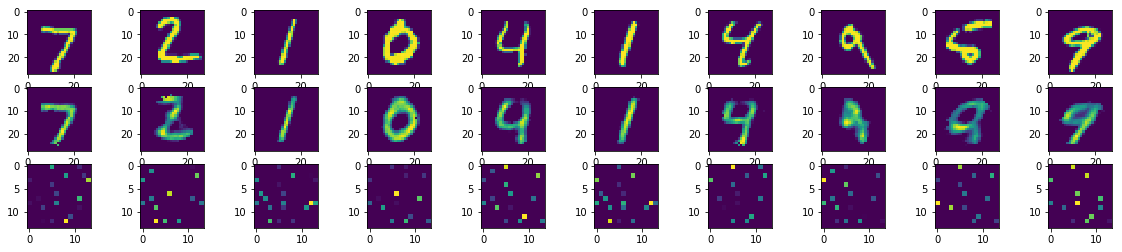

In [33]:
#Showing the regenerated images
f, a = plt.subplots(3, 10, figsize=(20, 4))
for i in range(num_test_imgs):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28))) #In the 1st row we'll see all the test imgs
    a[1][i].imshow(np.reshape(results[i], (28, 28))) #In the 2nd row we will see all the result imgs
    #Get a good representiation of what the hl2 trying to do
    a[2][i].imshow(np.reshape(results_hl2[i], (14, 14))) 
plt.show()


- The first row represents the original data
- The second row represents the regenrated data by the auto-encoder 
- The third one represents the featured detected by the second hidden layer

Thanks for reading  
Hope you enjoyed it
Peace ^_^